In [132]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from tqdm import tqdm_notebook

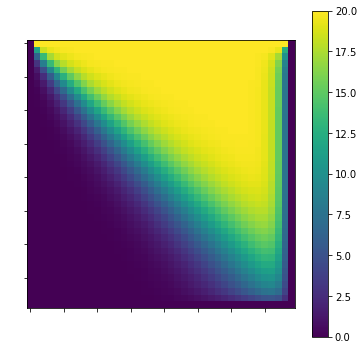

In [214]:
N = 40
T = np.zeros((N,N))
T = np.random.random((N,N))

dx = 0.1
dV = dx**2

T1 = 20
T0 = 0

L0 = 1
Lambda = np.full((N,N), L0)


T[0, :] = T1
T[:, 0] = T0
T[:, -1] = T0
T[-1, :] = T0

def refreshT():
    T[0, :] = T1
    T[:, 0] = T0
    T[:, -1] = T0
    T[-1, :] = T0
    
refreshT()

b = 0
small = 1e-15

for _ in tqdm_notebook(range(50)): 
    for i in range(1,N-1):
        P = np.zeros(N)
        Q = np.zeros(N)
        Q[0] = T[i, 0]
        for j in range(0,N-1):
            a_w = 2*Lambda[i,j-1]*Lambda[i,j]/(Lambda[i,j-1]+Lambda[i,j] + small)
            a_n = 2*Lambda[i+1,j]*Lambda[i,j]/(Lambda[i+1,j]+Lambda[i,j] + small)
            a_e = 2*Lambda[i,j+1]*Lambda[i,j]/(Lambda[i,j+1]+Lambda[i,j] + small)
            a_s = 2*Lambda[i-1,j]*Lambda[i,j]/(Lambda[i-1,j]+Lambda[i,j] + small)
            
            a_p = a_w + a_n + a_e + a_s

            P[j+1] = a_e / (a_p-a_w*P[j])
            Q[j+1] = (a_n*T[i+1,j]+a_s*T[i-1,j]+b + a_w*Q[j])/(a_p-a_w*P[j])

        for j in range(N-2, 0, -1):
            T[i,j] = P[j]*T[i,j+1]+Q[j]
            
        refreshT()

    for j in range(1,N-1):
        P = np.zeros(N)
        Q = np.zeros(N)
        Q[0] = T[0, j]
        for i in range(0,N-1):
            a_w = 2*Lambda[i,j-1]*Lambda[i,j]/(Lambda[i,j-1]+Lambda[i,j] + small)
            a_n = 2*Lambda[i+1,j]*Lambda[i,j]/(Lambda[i+1,j]+Lambda[i,j] + small)
            a_e = 2*Lambda[i,j+1]*Lambda[i,j]/(Lambda[i,j+1]+Lambda[i,j] + small)
            a_s = 2*Lambda[i-1,j]*Lambda[i,j]/(Lambda[i-1,j]+Lambda[i,j] + small)
            
            a_p = a_w + a_n + a_e + a_s

            P[i+1] = a_n / (a_p-a_s*P[i])
            Q[i+1] = (a_w*T[i,j+1]+a_e*T[i,j-1]+b + a_s*Q[i])/(a_p-a_s*P[i])

        for i in range(N-2, 0, -1):
            T[i,j] = P[i]*T[i+1,j]+Q[i]
            
        refreshT()
    
fig, ax = plt.subplots(figsize = (6,6))
picture = ax.imshow(T)
ax.tick_params(labelcolor='w')
fig.colorbar(picture)

In [200]:
N = 40
T = np.zeros((N,N))
T = np.random.random((N,N))

dx = 0.1
dV = dx**2

T1 = 20
T0 = 20

L0 = 0.1
Lambda = np.full((N,N), L0)


T[0, :] = T1
T[:, 0] = T0
T[:, -1] = T0
T[-1, :] = T0

# Lambda[:N//5, :N//5] = np.inf
# Lambda[:N//5, :N//5] = 1e20
def refreshT():
#     T[:N//5, :N//5] = T1
#     T[4*N//5:, :N//5] = T1
#     T[:N//5, 4*N//5:] = T1
#     T[4*N//5:, 4*N//5:] = T1

    T[0, :] = T1
    T[:, 0] = T0
    T[:, -1] = T0
    T[-1, :] = T0
    
refreshT()

b = 0

for _ in tqdm_notebook(range(600)): 
    for i in range(1,N-2):
        P = np.zeros(N)
        Q = np.zeros(N)
        for j in range(1,N-1):
            a_w = 2*Lambda[i,j-1]*Lambda[i,j]/(Lambda[i,j-1]+Lambda[i,j])
            a_n = 2*Lambda[i-1,j]*Lambda[i,j]/(Lambda[i-1,j]+Lambda[i,j])
            a_e = 2*Lambda[i,j+1]*Lambda[i,j]/(Lambda[i,j+1]+Lambda[i,j])
            a_s = 2*Lambda[i+1,j]*Lambda[i,j]/(Lambda[i+1,j]+Lambda[i,j])
            
            a_p = a_w + a_n + a_e + a_s

            P[j] = a_e / (a_p-a_w*P[j-1] +0.01)
            Q[j] = (a_n*T[i-1,j]+a_s*T[i+1,j]+b - a_w*Q[j-1])/(a_p-a_w*P[j-1] +0.01)

        for j in range(N-2, 0, -1):
            T[i,j] = P[j]*T[i,j+1]+Q[j]
            
#     refreshT()

    for j in range(1,N-2):
        P = np.zeros(N)
        Q = np.zeros(N)
        for i in range(1,N-1):
            a_w = 2*Lambda[i,j-1]*Lambda[i,j]/(Lambda[i,j-1]+Lambda[i,j])
            a_n = 2*Lambda[i-1,j]*Lambda[i,j]/(Lambda[i-1,j]+Lambda[i,j])
            a_e = 2*Lambda[i,j+1]*Lambda[i,j]/(Lambda[i,j+1]+Lambda[i,j])
            a_s = 2*Lambda[i+1,j]*Lambda[i,j]/(Lambda[i+1,j]+Lambda[i,j])
            
            a_p = a_w + a_n + a_e + a_s

            P[i] = a_s / (a_p-a_n*P[i-1] +0.01)
            Q[i] = (a_w*T[i,j-1]+a_e*T[i,j+1]+b - a_n*Q[i-1])/(a_p-a_n*P[i-1] +0.01)

        for i in range(N-2, 0, -1):
            T[i,j] = P[i]*T[i+1,j]+Q[i]
            
    refreshT()

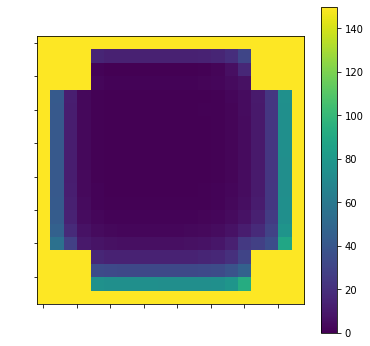

In [179]:
fig, ax = plt.subplots(figsize = (6,6))
picture = ax.imshow(T)
ax.tick_params(labelcolor='w')
fig.colorbar(picture)

In [156]:
save_T = T.copy()

In [171]:
(save_T - T).mean()

-2.8875656679118457e-11

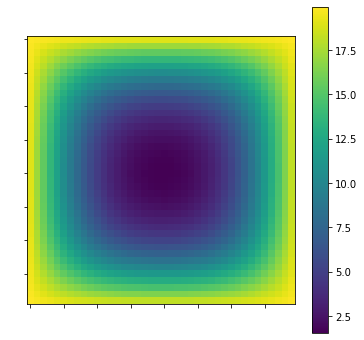

In [197]:
dx = 0;
Tb = 20;
Tb0 = 20;

imax = jmax = 40
T = np.random.random((imax,jmax))

k = 1
dh = 0.5
FaceArea = dh**2
delt = 0.1

for _ in range(600):
    for i in range(imax):
        for j in range(jmax):
            Tc = T[i, j];
            dx = dh;

            if (i == imax - 1):
                Te = Tb0; 
                dx = dx / 2;
            else:
                Te = T[i + 1, j];
            FluxE = (-k * FaceArea) / dx;

            if (i == 0):
                Tw = Tb0; 
                dx = dx / 2;
            else:
                Tw = T[i - 1, j];
            FluxW = (-k * FaceArea) / dx;

            if (j == jmax - 1):
                Tn = Tb0; 
                dx = dx / 2;
            else:
                Tn = T[i, j + 1];
            FluxN = (-k * FaceArea) / dx;

            if (j == 0):
                Ts = Tb; 
                dx = dx / 2
            else:
                Ts = T[i, j - 1];
            FluxS = (-k * FaceArea) / dx;

            FluxC = FluxE + FluxW + FluxN + FluxS;

            T[i, j] = Tc + delt * (FluxC * Tc - (FluxE * Te + FluxW * Tw + FluxN * Tn + FluxS * Ts));


fig, ax = plt.subplots(figsize = (6,6))
picture = ax.imshow(T.T)
ax.tick_params(labelcolor='w')
fig.colorbar(picture)

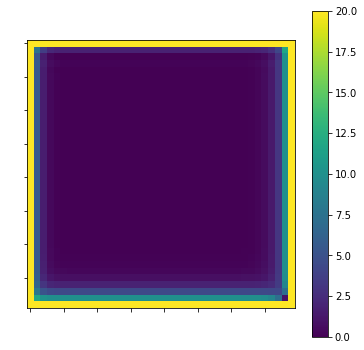

In [201]:
fig, ax = plt.subplots(figsize = (6,6))
picture = ax.imshow(T)
ax.tick_params(labelcolor='w')
fig.colorbar(picture)

In [ ]:
#
# T - шаг по времени
# hx = hy шаги по координатам
#
def solveLayer(vv):
    for k in range(1, Nxy + 1): # Первый полушаг по времени
#Заполнение коэффициентов СЛУ для неявной схемы. Крайние элементы VV всегда  = 0 (гран условия)
        a = [0 if i == 1 else - 0.5 * T / (hx ** 2) for i in range(1, Nxy + 1)]
        b = [T / (hx ** 2) + 1] * Nxy
        c = [0 if i == Nxy else -0.5 * T / (hx ** 2) for i in range(1, Nxy + 1)]
        d = [vv[i][k] * (1 - T / (hy ** 2)) + (vv[i][k + 1] + vv[i][k - 1]) * 0.5 * T / (hy ** 2) for i in
             range(1, Nxy + 1)]
        for j in range(1, Nxy):
            t = a[j] / b[j - 1]
            a[j] = 0
            b[j] -= t * c[j - 1]
            d[j] -= t * d[j - 1]
        vv[Nxy][k] = d[Nxy - 1] / b[Nxy - 1]
        for i in range(Nxy - 1, 0, -1):
            vv[i][k] = 1 / b[i - 1] * (d[i - 1] - c[i - 1] * vv[i + 1][k])

    for k in range(1, Nxy + 1): # Второй полушаг
        a = [0 if i == 1 else - 0.5 * T / (hx ** 2) for i in range(1, Nxy + 1)]
        b = [T / (hx ** 2) + 1] * Nxy
        c = [0 if i == Nxy else -0.5 * T / (hx ** 2) for i in range(1, Nxy + 1)]
        d = [vv[k][i] * (1 - T / (hy ** 2)) + (vv[k + 1][i] + vv[k - 1][i]) * 0.5 * T / (hy ** 2) for i in
             range(1, Nxy + 1)]
        for j in range(1, Nxy):
            t = a[j] / b[j - 1]
            a[j] = 0
            b[j] -= t * c[j - 1]
            d[j] -= t * d[j - 1]
        vv[k][Nxy] = d[Nxy - 1] / b[Nxy - 1]
        for i in range(Nxy - 1, 0, -1):
            vv[k][i] = 1 / b[i - 1] * (d[i - 1] - c[i - 1] * vv[k][i + 1])
    return vv

Please wait for a moment
Iteration finished


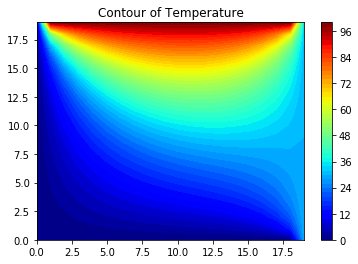

In [204]:
# Simple Numerical Laplace Equation Solution using Finite Difference Method
import numpy as np
import matplotlib.pyplot as plt

# Set maximum iteration
maxIter = 500

# Set Dimension and delta
lenX = lenY = 20 #we set it rectangular
delta = 1

# Boundary condition
Ttop = 100
Tbottom = 0
Tleft = 0
Tright = 30

# Initial guess of interior grid
Tguess = 30

# Set colour interpolation and colour map
colorinterpolation = 50
colourMap = plt.cm.jet #you can try: colourMap = plt.cm.coolwarm

# Set meshgrid
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))

# Set array size and set the interior value with Tguess
T = np.empty((lenX, lenY))
T.fill(Tguess)

# Set Boundary condition
T[(lenY-1):, :] = Ttop
T[:1, :] = Tbottom
T[:, (lenX-1):] = Tright
T[:, :1] = Tleft

# Iteration (We assume that the iteration is convergence in maxIter = 500)
print("Please wait for a moment")
for iteration in range(0, maxIter):
    for i in range(1, lenX-1, delta):
        for j in range(1, lenY-1, delta):
            T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])

print("Iteration finished")

# Configure the contour
plt.title("Contour of Temperature")
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)

# Set Colorbar
plt.colorbar()

# Show the result in the plot window
plt.show()

print("")